<a href="https://colab.research.google.com/github/jeanmichael1993/AtividadeKNN/blob/master/KNN_Atividade_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import sys
import pandas as pd

vPasta = '/TecnicasExploratorias'
sys.path.append(vPasta)

vLink = r'https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv'
!wget {vLink} -P drive/TecnicasExploratorias

vArquivo = '/content/drive/TecnicasExploratorias/heart.csv'
df = pd.read_csv(vArquivo, sep = ',' , encoding='utf-8')

--2024-05-06 15:37:37--  https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘drive/TecnicasExploratorias/heart.csv.1’

heart.csv.1         100%[===================>]  10.77K  --.-KB/s    in 0s      

2024-05-06 15:37:37 (59.3 MB/s) - ‘drive/TecnicasExploratorias/heart.csv.1’ saved [11024/11024]



### Características

 * <h2> Tabela de Variáveis  </h2>

| Variable Name | Role | Tipo | Demográfico | Descrição | Unidades | Valores ausentes |
|---------------|------|------|-------------|-------------|-------|----------------|
| age           | Feature | Integer | Idade |  | anos | não |
| sex           | Feature | Categorical | Sexo |  |  | não |
| cp            | Feature | Categorical |  |  |  | não |
| trestbps      | Feature | Integer | Pressão Arterial em Repouso | pressão arterial em repouso (na admissão ao hospital) | mm Hg | não |
| chol          | Feature | Integer | Colesterol Sérico | colesterol sérico | mg/dl | não |
| fbs           | Feature | Categorical | Açúcar no Sangue em Jejum | açúcar no sangue em jejum > 120 mg/dl |  | não |
| restecg       | Feature | Categorical |  |  |  | não |
| thalach       | Feature | Integer | Frequência Cardíaca Máxima | frequência cardíaca máxima alcançada |  | não |
| exang         | Feature | Categorical | Angina Induzida por Exercício | angina induzida por exercício |  | não |
| oldpeak       | Feature | Integer | Depressão de ST Induzida por Exercício | depressão de ST induzida por exercício em relação ao repouso |  | não |
| slope         | Feature | Categorical |  |  |  | não |
| ca            | Feature | Integer | Vasos Sanguíneos Principais Coloridos por Flouroscopia | número de vasos sanguíneos principais (0-3) coloridos por flouroscopia |  | sim |
| thal          | Feature | Categorical |  |  |  | sim |
| num           | Target | Integer | Diagnóstico de Doença Cardíaca | diagnóstico de doença cardíaca |  | não |

---


 * <h2> Informações adicionais sobre variáveis  </h2>

| Variável | Descrição                                                                                         | Valores                                                                   |
|----------|---------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| age      | Idade em anos.                                                                                    |                                                                           |
| sex      | Sexo (1 = masculino; 0 = feminino).                                                               |                                                                           |
| cp       | Tipo de dor torácica.                                                                            | Valor 1: angina típica.                                                  |
|          |                                                                                                   | Valor 2: angina atípica.                                                  |
|          |                                                                                                   | Valor 3: dor não anginosa.                                               |
|          |                                                                                                   | Valor 4: assintomático.                                                  |
| trestbps | Pressão arterial em repouso (em mm Hg na admissão ao hospital).                                  |                                                                           |
| chol     | Colesterol sérico em mg/dl.                                                                       |                                                                           |
| fbs      | Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso).                                 |                                                                           |
| restecg  | Resultados eletrocardiográficos em repouso.                                                       | Valor 0: normal.                                                          |
|          |                                                                                                   | Valor 1: ter anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV). |
|          |                                                                                                   | Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes. |
| thalach  | Frequência cardíaca máxima alcançada.                                                             |                                                                           |
| exang    | Angina induzida por exercício (1 = sim; 0 = não).                                                 |                                                                           |
| oldpeak  | Depressão do segmento ST induzida por exercício em relação ao repouso.                            |                                                                           |
| slope    | Inclinação do pico do segmento ST do exercício.                                                    | Valor 1: inclinação ascendente.                                           |
|          |                                                                                                   | Valor 2: plano.                                                           |
|          |                                                                                                   | Valor 3: descendente.                                                     |
| ca       | Número de vasos principais (0-3) coloridos por fluoroscopia.                                      |                                                                           |
| thal     | 3 = normal; 6 = defeito fixo; 7 = defeito reversível.                                             |                                                                           |
| num      | Diagnóstico de doença cardíaca (estado angiográfico da doença).                                    | Valor 0: < 50% de estreitamento do diâmetro.                              |
|          |                                                                                                   | Valor 1: > 50% de estreitamento do diâmetro (em qualquer vaso principal). |





In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


• A partir do dataset escolhido na aula anterior;
• Aplique o algoritmo K-NN:
– Você pode fazer a sua codificação do zero, ou;
– Utilizar a biblioteca do scikit-learn (biblioteca de
aprendizado de máquina de código aberto em Python)
– Não esqueçam de normalizar os dados;
– Escolha os atributos relevantes ao seu problema;
– Faça as métricas de desempenho nos dados de teste.

* Acuracia = mede a porcentagem das tuplas/amostras
dos dados de teste que são corretamente classificados;
* Matriz confusão

* Sensitividade = Positivos verdadeiros/ Total de positivos
* Especificidade = Negativos verdadeiros / Total de negativos
* Precisão = Positivos verdadeiros / Positivos verdadeiros + Falsos positivos

* Revocação = Positivos verdadeiros / Positivos verdadeiros + Falsos negativos

* Medida F = 2 * Precisão * Revocação / Precisão + Revocação

A medida F combina a precisão e revocação dos dados,

conhecida tradicionalmente como F-measure ou F-
score balanceada. Esta medida é aproximadamente a

média de ambas quando seus valores estão próximos.


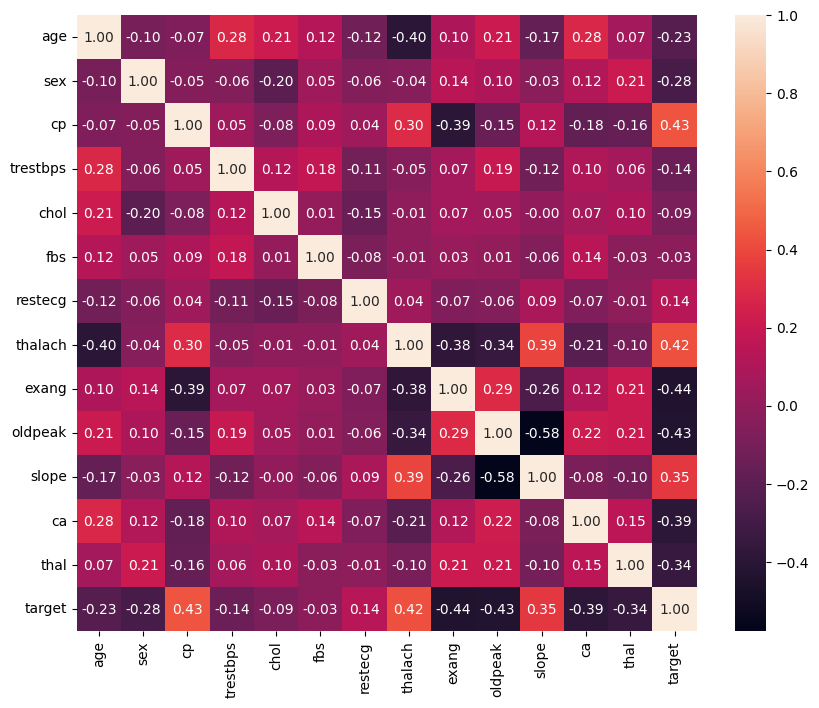

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot =True, fmt=".2f")
plt.show()

In [39]:
#Verificar se a quantidade do target é equivalente.
proporcao = df['target'].value_counts(normalize=True)

for valor, proporcao_valor in proporcao.items():
    print(f"Valor {valor}: {proporcao_valor*100:.2f}%")

Valor 1: 54.46%
Valor 0: 45.54%


In [40]:
#informação das colunas e se possuem nulos.
for column in df.columns:
  print(f"Coluna: {column.ljust(10)} | Menor valor = {str(df[column].min()).ljust(5)} | Maior valor = {str(df[column].max()).ljust(5)}| Nulos = {df[column].isna().sum()}")

Coluna: age        | Menor valor = 29    | Maior valor = 77   | Nulos = 0
Coluna: sex        | Menor valor = 0     | Maior valor = 1    | Nulos = 0
Coluna: cp         | Menor valor = 0     | Maior valor = 3    | Nulos = 0
Coluna: trestbps   | Menor valor = 94    | Maior valor = 200  | Nulos = 0
Coluna: chol       | Menor valor = 126   | Maior valor = 564  | Nulos = 0
Coluna: fbs        | Menor valor = 0     | Maior valor = 1    | Nulos = 0
Coluna: restecg    | Menor valor = 0     | Maior valor = 2    | Nulos = 0
Coluna: thalach    | Menor valor = 71    | Maior valor = 202  | Nulos = 0
Coluna: exang      | Menor valor = 0     | Maior valor = 1    | Nulos = 0
Coluna: oldpeak    | Menor valor = 0.0   | Maior valor = 6.2  | Nulos = 0
Coluna: slope      | Menor valor = 0     | Maior valor = 2    | Nulos = 0
Coluna: ca         | Menor valor = 0     | Maior valor = 4    | Nulos = 0
Coluna: thal       | Menor valor = 0     | Maior valor = 3    | Nulos = 0
Coluna: target     | Menor valor = 0  

validando como ficaria separando a base em 70% / 30%

In [41]:
XTT = df
yTT = df['target']

X_trainValid, X_testValid, y_trainValid, y_testValid = train_test_split(XTT, yTT, test_size=0.3, random_state = 40,  stratify=y)
proporcaoTreino = X_trainValid['target'].value_counts(normalize=True)
proporcaoTeste = X_testValid['target'].value_counts(normalize=True)
proporcaoOriginal = XTT['target'].value_counts(normalize=True)

print(f'Proporção Original')
for valor, proporcao_valor in proporcaoOriginal.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")
print(f'\nProporção Treino')
for valor, proporcao_valor in proporcaoTreino.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")
print(f'\nProporção Teste')
for valor, proporcao_valor in proporcaoTeste.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")

Proporção Original
	Valor 1: 54.46%
	Valor 0: 45.54%

Proporção Treino
	Valor 1: 54.25%
	Valor 0: 45.75%

Proporção Teste
	Valor 1: 54.95%
	Valor 0: 45.05%


#Pegando uma Amostragem

In [63]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado df com colunas de características (X) e rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Calcule a quantidade de linhas para cada rótulo
# Você pode ajustar o número de amostras desejadas para cada rótulo conforme necessário
n_samples_per_class = 100
counts = y.value_counts()
n_samples = (counts / counts.sum() * n_samples_per_class).astype(int)

# Faça uma seleção aleatória de linhas para cada rótulo
samples = []
for label, count in n_samples.items():
    samples.append(df[df['target'] == label].sample(count))

# Combine as seleções aleatórias para formar a amostra final
sample_df = pd.concat(samples)

# Agora, sample_df contém uma amostra aleatória de 500 linhas com a mesma proporção de rótulos que o DataFrame original


In [66]:
X_sample = sample_df
y_sample = sample_df['target']

X_train_pct, X_test_pct, y_train_pct, y_test_pct = train_test_split(X_sample, y_sample, test_size=0.3, random_state = 40)
proporcaoTreino = X_train_pct['target'].value_counts(normalize=True)
proporcaoTeste = X_test_pct['target'].value_counts(normalize=True)
proporcaoOriginal = X_sample['target'].value_counts(normalize=True)

print(f'Proporção Original')
for valor, proporcao_valor in proporcaoOriginal.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")
print(f'\nProporção Treino')
for valor, proporcao_valor in proporcaoTreino.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")
print(f'\nProporção Teste')
for valor, proporcao_valor in proporcaoTeste.items():
    print(f"\tValor {valor}: {proporcao_valor*100:.2f}%")

Proporção Original
	Valor 1: 54.55%
	Valor 0: 45.45%

Proporção Treino
	Valor 1: 55.07%
	Valor 0: 44.93%

Proporção Teste
	Valor 1: 53.33%
	Valor 0: 46.67%


#Descobrindo os melhores parametros para usar no KNN
obs.: Pegar uma amostra de se a base for muito grande.

Esse código, em resumo, executa uma seleção de características usando o método SelectKBest do scikit-learn, calcula as pontuações de importância das características usando o método estatístico f_classif, e depois filtra as características com base em um limite de pontuação.

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

X = X_sample.drop('target', axis=1)
y = X_sample['target']

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

feature_scores = selector.scores_
feature_names = X.columns

scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)

print(scores_df)



     Feature      Score
8      exang  39.968233
7    thalach  33.432438
11        ca  30.076271
2         cp  18.254082
9    oldpeak  17.478241
1        sex  11.635406
10     slope   8.937012
12      thal   8.871410
0        age   3.632934
6    restecg   0.356876
5        fbs   0.130963
3   trestbps   0.110502
4       chol   0.023490


In [68]:
lst_colunas_for = scores_df.sort_values(by='Score', ascending=False)['Feature'].tolist()

listas = []
for i in range(len(lst_colunas_for), 0, -1):
    listas.append(lst_colunas_for[:i])
    print(lst_colunas_for[:i])

['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal', 'age', 'restecg', 'fbs', 'trestbps', 'chol']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal', 'age', 'restecg', 'fbs', 'trestbps']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal', 'age', 'restecg', 'fbs']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal', 'age', 'restecg']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal', 'age']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'thal']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex', 'slope']
['exang', 'thalach', 'ca', 'cp', 'oldpeak', 'sex']
['exang', 'thalach', 'ca', 'cp', 'oldpeak']
['exang', 'thalach', 'ca', 'cp']
['exang', 'thalach', 'ca']
['exang', 'thalach']
['exang']


In [69]:
import time
import numpy as np


vInicio = time.time()

lst_acuracia = []
lst_f1 = []
lst_matriz_confusao = []
lst_valores_k = []
lst_rs = []
lst_col = []

vQtd = 0
for rs in range(0,101):
  for col in listas:
    for k in range(1,22,2):
      vQtd += 1
      X = df[col]
      y = df['target']
      scaler = MinMaxScaler()
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)#,  stratify=y)
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)
      knn = KNeighborsClassifier(n_neighbors=k)

      knn.fit(X_train_scaled, y_train)
      y_pred = knn.predict(X_test_scaled)
      acuracia = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      conf_matrix = confusion_matrix(y_test, y_pred)
      lst_acuracia.append(acuracia)
      lst_f1.append(f1)
      lst_matriz_confusao.append(conf_matrix)
      lst_valores_k.append(k)
      lst_rs.append(rs)
      lst_col.append(len(col))

# Encontrar o melhor valor de k baseado na acurácia
id_melhor_k = np.argmax(lst_acuracia)
melhor_k = lst_valores_k[id_melhor_k]
melhor_Acuracia = lst_acuracia[id_melhor_k]
melhor_f1 = lst_f1[id_melhor_k]
melhor_matriz_confusao = lst_matriz_confusao[id_melhor_k]
melhor_rs = lst_rs[id_melhor_k]
melhor_col = lst_col[id_melhor_k]

# armazenamento dos calculos em um df
df_resultBestKNN = pd.DataFrame(
    {'Acuracia': lst_acuracia
     ,'F1 Score': lst_f1
     ,'Matriz Confusao': lst_matriz_confusao
     ,'k': lst_valores_k
     ,'random': melhor_rs
     ,'Colunas': melhor_col
     }
)

print(f"Resultado após {vQtd} cálculos")
print("\tMelhor valor de k encontrado:")
print(f"\t * Melhor k = {melhor_k} - Acurácia: {melhor_Acuracia * 100:.2f}%")
print(f"\t * Melhor F1 Score: {melhor_f1}")
print(f"\t * Melhor random_state: {melhor_rs}")
print(f"\t * Melhor qtd col: {melhor_col}")
vFim = time.time()

vTempoTotal = vFim - vInicio

horas = int(vTempoTotal // 3600)
vTempoTotal %= 3600
minutos = int(vTempoTotal // 60)
segundos = int(vTempoTotal % 60)

print(f"\nTempo de cálculo: {horas} horas, {minutos} minutos e {segundos} segundos")

Resultado após 14443 cálculos
	Melhor valor de k encontrado:
	 * Melhor k = 5 - Acurácia: 93.41%
	 * Melhor F1 Score: 0.9433962264150944
	 * Melhor random_state: 40
	 * Melhor qtd col: 10

Tempo de cálculo: 0 horas, 4 minutos e 23 segundos


#Rodando o KNN


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.datasets import make_classification



In [71]:
X = df[lst_colunas_for[:melhor_col]]
y = df['target']

In [72]:
seed = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        40
           1       0.91      0.98      0.94        51

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91

[[35  5]
 [ 1 50]]


#Curva ROC

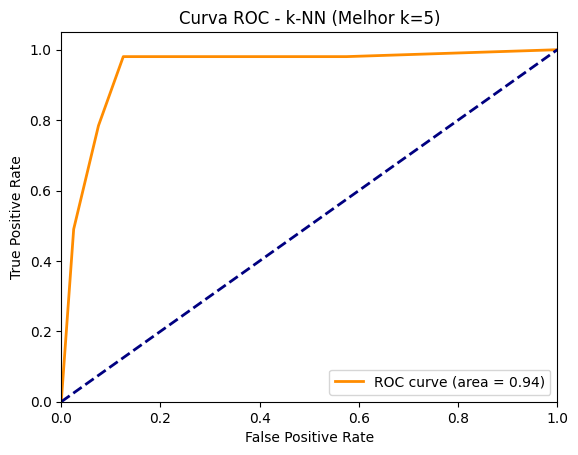

In [74]:

# Métricas de Avaliação
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score
)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - k-NN (Melhor k={5})')
plt.legend(loc="lower right")
plt.show()


#Segunda forma de encontrar o melhor K (menos efetivo)

In [50]:
knn_params = {
    "n_neighbors" : range(1,20,2),
    "weights":["uniform", "distance"],
    "metric":["euclidean","manhattan","minkowski"],
    #"algoritm": ["auto", "ball_tree","kd_tree","bruto"],
    "leaf_size": range(1,50,5)
}

knn = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state = seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=4, cv=cv, scoring ="accuracy", error_score=0)
grid_results = grid_search.fit(X_train, y_train)

final_model= knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

[[35  6]
 [ 7 43]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
